# K-nearest neighbors

KNN is a typical example of a lazy learner. It is called lazy not because of its apparent simplicity, but because it doesn't learn a discriminative function from the training data, but memorizes the training dataset instead.

## Parametric versus nonparametric models

Machine learning algorithms can be grouped into parametric and nonparametric models. Using parametric models, we estimate parameters from the training dataset to learn a function that can classify new data points without requiring the original training dataset anymore. Typical examples of parametric models are the perceptron, logistic regression, and the linear SVM. In contrast, nonparametric models can't be characterized by a fixed set of parameters, and the number of parameters grows with the training data. Two examples of non-parametric models that we have seen so far are the decision tree classifier/random forest and the kernel SVM. KNN belongs to a subcategory of instance-based non-parametric models.

The KNN algorithm itself is fairly straightforward and can be summarized by the following steps:
> 1. Choose the number of k and a distance metric.
> 2. Find the k-nearest neighbors of the sample that we want to classify.
> 3. Assign the class label by majority vote.

The following figure illustrates how a new data point (?) is assigned the triangle class label based on majority voting among its five nearest neighbors.

<img src="images/knn_example.jpeg" alt="KNN example" title="KNN example" height="200" width="350">

Based on the chosen distance metric, the KNN algorithm finds the k samples in the training dataset that are closest (most similar) to the point that we want to classify. The class label of the new data point is then determined by a majority vote among its k nearest neighbors.

In [1]:
#prepare data
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

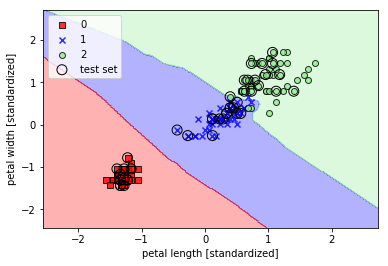

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from plot_regions import plot_decision_regions

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

The right choice of k is crucial to find a good balance between overfitting and underfitting. We also have to make sure that we choose a distance metric that is appropriate for the features in the dataset. The minkowski distance is a generalization of the Euclidean and Manhattan distance, which can be written as follows:

\begin{equation*}
d \left( x^(i), x^{(j)} \right) = \sqrt[p]{\sum_k \left|x_k^{(i)} - x_k^{(j)} \right|^p}
\end{equation*}

It becomes the Euclidean distance if we set the parameter p=2 or the Manhattan distance at p=1.

### The curse of dimensionality


It is important to mention that KNN is very susceptible to overfitting due to the curse of dimensionality. The curse of dimensionality describes the phenomenon where the feature space becomes increasingly sparse for an increasing number of dimensions of a fixed-size training dataset. Intuitively, we can think of even the closest neighbors being too far away in a high-dimensional space to give a good estimate.

We have discussed the concept of regularization in the section about logistic regression as one way to avoid overfitting. However, in models where regularization is not applicable, such as decision trees and KNN, we can use feature selection and dimensionality reduction techniques to help us avoid the curse of dimensionality.